In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.
1.14.0


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

5

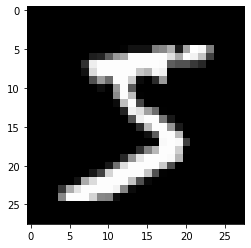

In [4]:
plt.imshow(X_train[0], cmap='gray')
y_train[0]

In [5]:
X_train = X_train.reshape((60000, 28*28))/255.
X_test = X_test.reshape((10000, 28*28))/255.

In [6]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [7]:
def plot(loss_train, loss_test, accuracy_train, accuracy_test, EPOCHS):
    x = np.arange(EPOCHS)
    plt.figure()
    fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(20, 5))
    ax1.plot(x, loss_train, color='red', linewidth=1.0, linestyle='--',
             label='train loss')
    ax1.plot(x, loss_test, color='green', linewidth=1.0, linestyle='--',
             label='test loss')
    ax1.legend()
    ax1.set_title('Cross entropy loss')

    ax2.plot(x, accuracy_train, color='red', linewidth=1.0, linestyle='--',
             label='accuracy train')
    ax2.plot(x, accuracy_test, color='green', linewidth=1.0, linestyle='--',
             label='accuracy test')
    ax2.legend()
    ax2.set_title('Accuracy')

    plt.show()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



<Figure size 432x288 with 0 Axes>

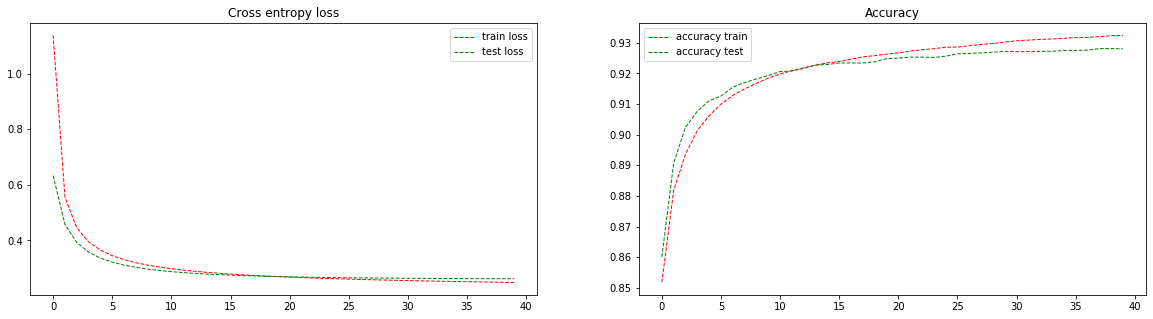

In [8]:
def train():
    # run this again if you remake your graph
    tf.keras.backend.clear_session()
    s = tf.Session()
    # Model parameters: W and b
    W = tf.get_variable(name="Weight", shape=[784, 10])
    b = tf.get_variable(name="bias", shape=[10])

    # Placeholders for the input data
    input_X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
    input_y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

    # Compute predictions
    # logits for input_X, resulting shape should be [input_X.shape[0], 10]
    logits = tf.matmul(input_X, W)+b

    # Apply tf.nn.softmax to logits
    probas = tf.nn.softmax(logits)

    # Apply tf.argmax to find a class index with highest probability
    classes = tf.argmax(probas, axis=1)

    # Loss should be a scalar number: average loss over all the objects
    # with tf.reduce_mean().
    # Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded
    # input_y and logits.
    # It is identical to calculating cross-entropy on top of probas, but
    # is more numerically friendly (read the docs).
    softmax = tf.nn.softmax_cross_entropy_with_logits(labels=input_y,
                                                      logits=logits)
    loss = tf.reduce_mean(softmax)

    # Use a default tf.train.AdamOptimizer to get an SGD step
    step = tf.train.AdamOptimizer().minimize(loss)

    s.run(tf.global_variables_initializer())

    BATCH_SIZE = 512
    EPOCHS = 40

    loss_train = []
    loss_test = []
    accuracy_train = []
    accuracy_test = []

    # We finish an epoch when we've looked at all training samples
    for epoch in range(EPOCHS):
        batch_losses = []
        # data is already shuffled
        for batch_start in range(0, X_train.shape[0], BATCH_SIZE):
            X_batch = X_train[batch_start:batch_start+BATCH_SIZE]
            y_batch = y_train_oh[batch_start:batch_start+BATCH_SIZE]
            _, batch_loss = s.run([step, loss],
                                  {input_X: X_batch,
                                   input_y: y_batch})
            # collect batch losses, this is almost free as
            # we need a forward pass for backprop anyway
            batch_losses.append(batch_loss)
        
        # Loss for train and test
        loss_train.append(np.mean(batch_losses))
        loss_test.append(s.run(loss, {input_X: X_test,
                                      input_y: y_test_oh}))
        # Accuracy for train and test
        accuracy_train.append(accuracy_score(y_train,
                                             s.run(classes,
                                                   {input_X: X_train})))
        accuracy_test.append(accuracy_score(y_test,
                                            s.run(classes,
                                                  {input_X: X_test})))
    plot(loss_train, loss_test, accuracy_train, accuracy_test, EPOCHS)

train()

Instructions for updating:
Use keras.layers.dense instead.


<Figure size 432x288 with 0 Axes>

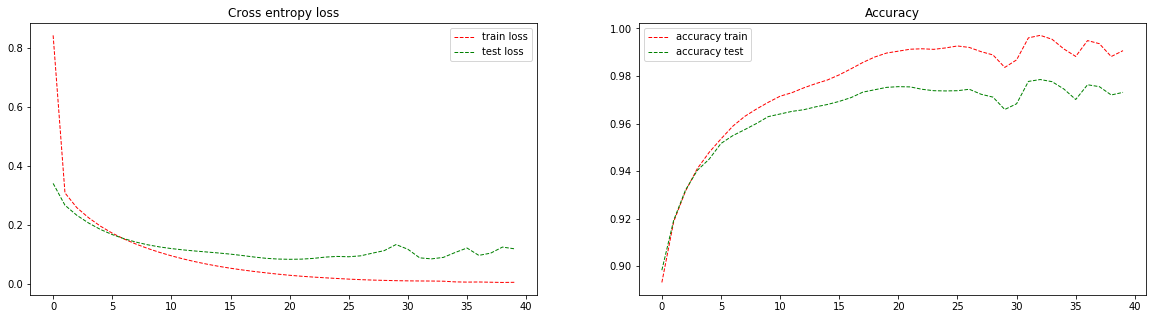

In [9]:
def train_MLP():
    # run this again if you remake your graph
    tf.keras.backend.clear_session()
    s = tf.Session()
    # Model parameters: W and b
    W = tf.get_variable(name="Weight", shape=[784, 10])
    b = tf.get_variable(name="bias", shape=[10])

    # Placeholders for the input data
    input_X = tf.placeholder(dtype=tf.float32, shape=[None, 784])
    input_y = tf.placeholder(dtype=tf.float32, shape=[None, 10])

    hidden1 = tf.layers.dense(input_X, 784, activation=tf.nn.sigmoid)
    hidden2 = tf.layers.dense(hidden1, 784, activation=tf.nn.sigmoid)
    # Compute predictions
    # logits for input_X, resulting shape should be [input_X.shape[0], 10]
    logits = tf.matmul(hidden2, W)+b
    # apply tf.nn.softmax to logits
    probas = tf.nn.softmax(logits)
    # apply tf.argmax to find a class index with highest probability
    classes = tf.argmax(probas, axis=1)

    # Loss should be a scalar number: average loss over all the objects
    # with tf.reduce_mean().
    # Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot
    # encoded input_y and logits.
    # It is identical to calculating cross-entropy on top of probas,
    # but is more numerically friendly (read the docs).
    softmax = tf.nn.softmax_cross_entropy_with_logits(labels=input_y,
                                                      logits=logits)
    loss = tf.reduce_mean(softmax)

    # Use a default tf.train.AdamOptimizer to get an SGD step
    ### YOUR CODE HERE ### optimizer step that minimizes the loss
    step = tf.train.AdamOptimizer().minimize(loss)

    s.run(tf.global_variables_initializer())

    BATCH_SIZE = 512
    EPOCHS = 40

    loss_train = []
    loss_test = []
    accuracy_train = []
    accuracy_test = []

    # we finish an epoch when we've looked at all training samples
    for epoch in range(EPOCHS):
        batch_losses = []
        # data is already shuffled
        for batch_start in range(0, X_train.shape[0], BATCH_SIZE):
            X_batch = X_train[batch_start:batch_start+BATCH_SIZE]
            y_batch = y_train_oh[batch_start:batch_start+BATCH_SIZE]
            _, batch_loss = s.run([step, loss], {input_X: X_batch, 
                                                input_y: y_batch})
            # collect batch losses, this is almost free as we need a
            # forward pass for backprop anyway
            batch_losses.append(batch_loss)
        
        # Loss for train and test
        loss_train.append(np.mean(batch_losses))
        loss_test.append(s.run(loss, {input_X: X_test,
                                      input_y: y_test_oh}))
        # Accuracy for train and test
        accuracy_train.append(accuracy_score(y_train,
                                             s.run(classes,
                                                   {input_X: X_train})))
        accuracy_test.append(accuracy_score(y_test,
                                            s.run(classes,
                                                  {input_X: X_test})))
    plot(loss_train, loss_test, accuracy_train, accuracy_test, EPOCHS)

train_MLP()